In [104]:
import PIL
#from PIL import Image
import numpy as np
from scipy.fft import fft,fftshift
import math
import cv2
from matplotlib import pyplot as plt
import cmath

In [105]:
I1 = cv2.imread('fourier.png',0)
I2 = cv2.imread('fourier_transform.png',0)

M1,N1 = I1.shape
M2,N2 = I2.shape

In [106]:
#************TWO Dimesnional Fourier TRansform Definition ********************
def DFT_2Dim(f,M,N):
   #Create a 2D array which will hold fourier transform
    rows,cols = (M,N) # image's height and width
    F = []
    for k in range(rows):
        col = []
        for l in range(cols):
            col.append(0)
        F.append(col) # it will hold the Discrete fourier transform

    #Create a 2D array which will hold fourier transform
    final_res = [] # M cross N matrix instead of N cross M
    for k in range(cols):
        row = []
        for l in range(rows):
            row.append(0)
        final_res.append(row) # it will hold the 2 dimensional Discrete fourier transform
   #***********************************
    for m in range(M):
        x = f[m]  
        F[m] = fft(x)
    for n in range(N):
        res = [sub[n] for sub in F] #array of column of matrix F
        final_res[n] = fft(res)
    matrix = np.array(final_res)
    matrix = matrix.T
    return matrix

In [107]:
F1 = DFT_2Dim(I1,M1,N1)
F2 = DFT_2Dim(I2,M2,N2)

In [108]:
# get the magnitude and phase
mag1 = np.abs(F1)
phase1 = np.zeros_like(F1)
phase1[mag1!=0] = F1[mag1!=0]/mag1[mag1!=0]
mag1 = mag1/(np.sqrt(M1*N1))

In [109]:
# get the magnitude and phase
mag2 = np.abs(F2)
phase2 = np.zeros_like(F2)
phase2[mag2!=0] = F2[mag2!=0]/mag2[mag2!=0]
mag2 = mag2/(np.sqrt(M2*N2))

In [110]:
#Using the property that taking DFT of the DFT of an image gives a flipped image to compute the IDFT.
def idft_2D(magnitude, phase, shift_first=True):
    # get the DFT from magnitude and phase
    dft = magnitude*phase
    # get the shape of the image
    m, n = np.shape(dft)
    
    if shift_first:
        dft = fftshift(dft)
    # perform 2D DFT on the DFT
    row_transform = fft(dft, axis=1)
    final_transform = fft(row_transform, axis=0)
    # in the case of rotated DFT, fftshift is not performed from
    # before. So use the DFT as it as and fftshift the final image
    if not shift_first:
        final_transform = fftshift(final_transform)
    # get the magnitude. We do not need the phase as we want the real
    # valued image as the output
    mag = np.abs(final_transform)
    # use the property that taking DFT of the DFT of an image results in
    # a flipped image. undo the flipping effect
    mag = mag[::-1, ::-1]
    # normalize to ensure the transform is unitary
    return mag/(np.sqrt(m*n))

In [111]:
def DFT_mag_for_plotting(magnitude):
    return np.log10(magnitude)

In [112]:
def plotter_two_images(image1, image2, title_1="", title_2=""):
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(9, 12), constrained_layout=True)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax1.imshow(image1, 'gray')
    ax2.imshow(image2, 'gray')
    ax1.title.set_text(title_1)
    ax2.title.set_text(title_2)
    plt.axis('off')
    plt.show()

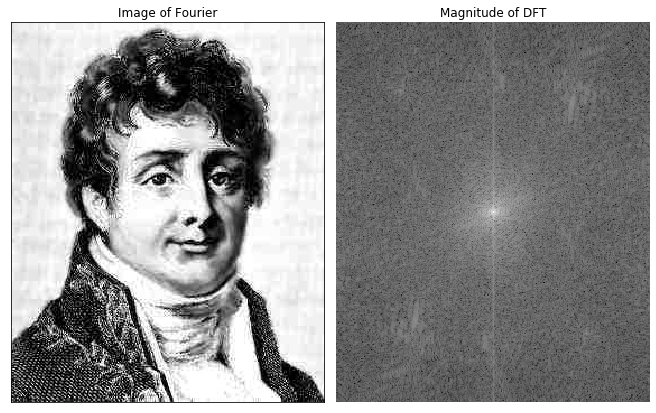

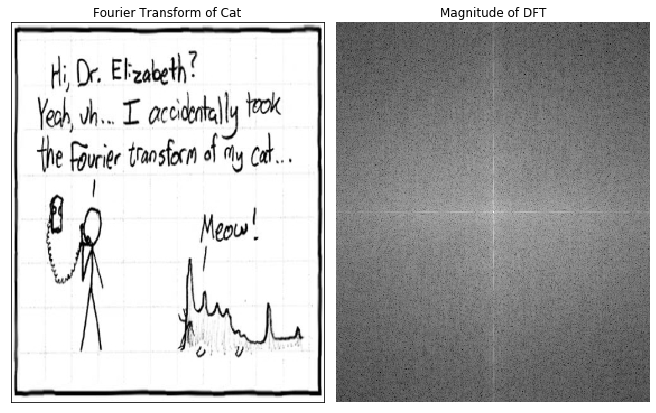

In [113]:
m_four, p_four = dft_2D(I1)
m_four_trans, p_four_trans = dft_2D(I2)
plotter_two_images(I1, DFT_mag_for_plotting(
    m_four), "Image of Fourier", "Magnitude of DFT")
plotter_two_images(I2, DFT_mag_for_plotting(
    m_four_trans), "Fourier Transform of Cat", "Magnitude of DFT")


In [114]:
# get the resulting images by flipping the 
# magnitudes and phases of the DFTs
im3 = idft_2D(mag1, phase2)
im4 = idft_2D(mag2, phase1)

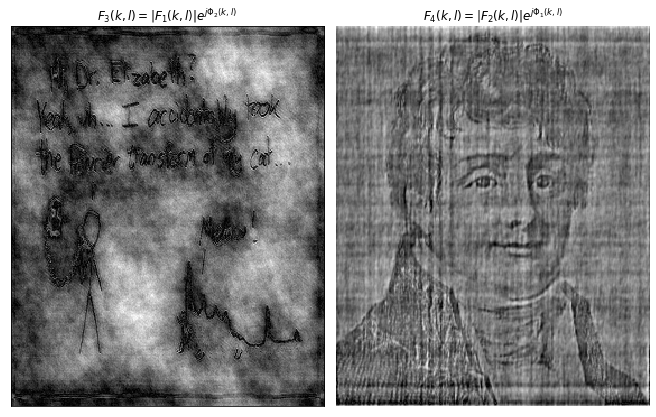

In [115]:
plotter_two_images(im3, im4,
                   r"$F_{3}(k,l) = \|F_{1}(k, l)\|e^{j\Phi_{2}(k, l)}$", r"$F_{4}(k,l) = \|F_{2}(k, l)\|e^{j\Phi_{1}(k, l)}$")